In [201]:
import sys
import numpy as np 
import sklearn
import matplotlib
from numpy import *
import numpy 
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from queue import PriorityQueue as pq
from tqdm import tqdm_notebook as tqdm
from sklearn import manifold, datasets
from sklearn.utils.graph import graph_shortest_path
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import kneighbors_graph as kg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [202]:
def LLE(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    A = kg(X, k, mode='distance')
    A = A.toarray()
    n = len(X)
    W = np.zeros((n,n))
    for i in tqdm(range(n)):
        Z = X[A[i, :] > 0] - X[i]
        C = np.matmul(Z, Z.T)
        w = np.matmul(np.linalg.pinv(C), np.ones((C.shape[0], 1)))
        W[i,A[i,:] == 0] = 0
        W[i,A[i,:] > 0] = (w / np.sum(w)).flatten()
    I = np.identity(n)
    temp = I - W
    M = np.matmul(temp.T,temp)
    values, u = np.linalg.eigh(M)
    Y = u[:, 1:output_dim+1]
    print(Y.shape)
    return Y

In [203]:
path = './'
data_name = 'mnist_4000.mat'
save_path = './mnist_result'
data_path = path + './' + data_name
MAT = sio.loadmat(data_path)
trset = MAT['trset'][:, 0:-1]
teset = MAT['teset'][:, 0:-1]
data = teset[:1000]
d = 2
K = 10

In [204]:
Y = LLE(data, 10, 2)


(1000, 2)


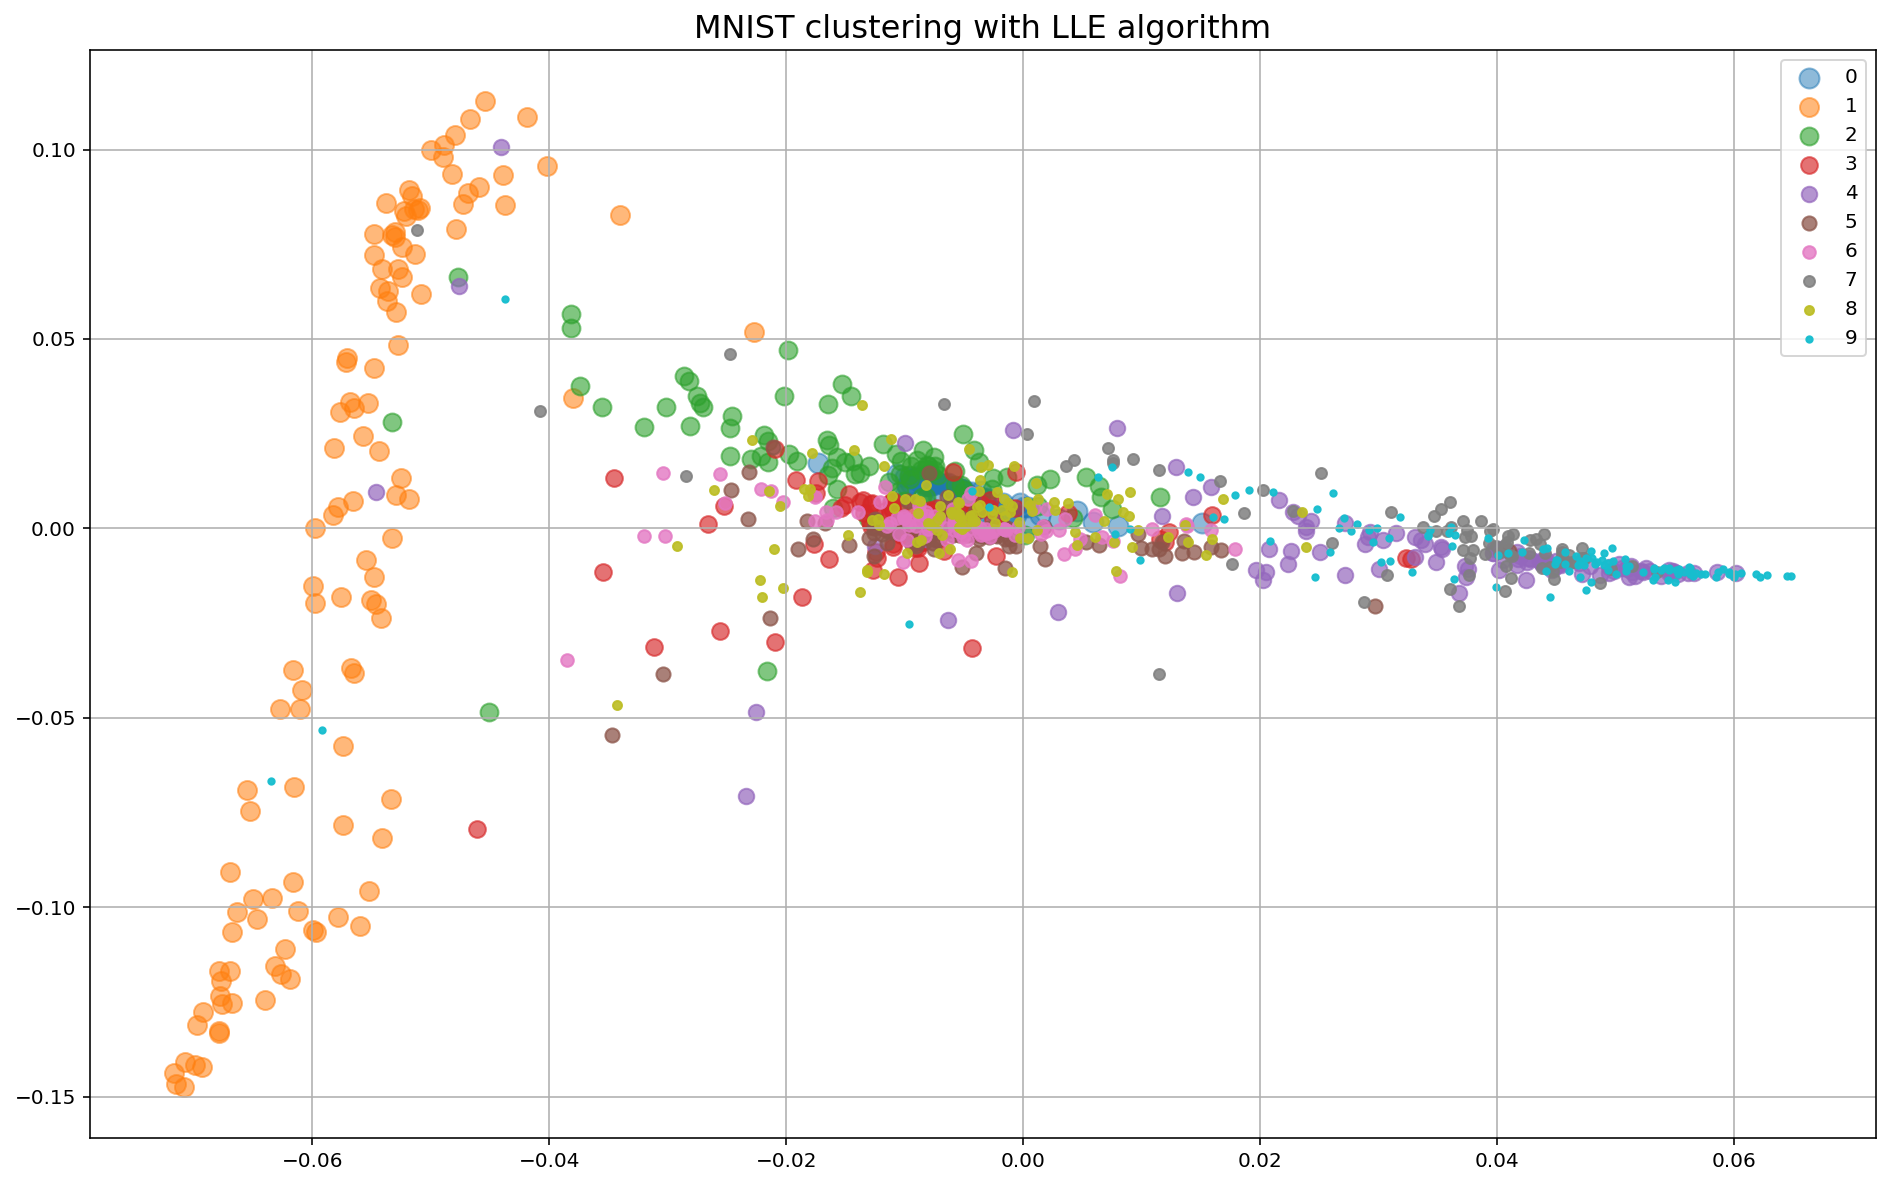

<Figure size 432x288 with 0 Axes>

In [219]:
plt.figure(figsize=(16, 10))
for i in range(10):
    plt.scatter(Y[y == i, 0], Y[y == i, 1], label=f'{i}', s=-10 * i + 100, alpha=0.5 + i/20)
plt.grid()
plt.legend()
plt.title('MNIST clustering with LLE algorithm', fontsize=16)
plt.show()
plt.savefig('LLE clustering mnist')